In [1]:
#Prints **all** console output, not just last item in cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Eric Meinhardt / emeinhardt@ucsd.edu**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span><ul class="toc-item"><li><span><a href="#Processing-steps" data-toc-modified-id="Processing-steps-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Processing steps</a></span></li><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Dependencies</a></span></li><li><span><a href="#Outputs" data-toc-modified-id="Outputs-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Outputs</a></span></li></ul></li><li><span><a href="#Imports-/-loading-data" data-toc-modified-id="Imports-/-loading-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports / loading data</a></span><ul class="toc-item"><li><span><a href="#More-code-for-interfacing-with-Buckeye" data-toc-modified-id="More-code-for-interfacing-with-Buckeye-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>More code for interfacing with Buckeye</a></span></li></ul></li><li><span><a href="#Seyfarth's-utterance-segmentation" data-toc-modified-id="Seyfarth's-utterance-segmentation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Seyfarth's utterance segmentation</a></span><ul class="toc-item"><li><span><a href="#Segmentation-using-the-utterance-container" data-toc-modified-id="Segmentation-using-the-utterance-container-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Segmentation using the <code>utterance</code> container</a></span></li><li><span><a href="#Making-an-utterance-relation" data-toc-modified-id="Making-an-utterance-relation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Making an utterance relation</a></span></li><li><span><a href="#Write-utterance-relation,-vocabulary-and-simple-utterance-list-to-file" data-toc-modified-id="Write-utterance-relation,-vocabulary-and-simple-utterance-list-to-file-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Write utterance relation, vocabulary and simple utterance list to file</a></span><ul class="toc-item"><li><span><a href="#Utterance-relation" data-toc-modified-id="Utterance-relation-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Utterance relation</a></span></li><li><span><a href="#(Orthographic)-Vocabulary" data-toc-modified-id="(Orthographic)-Vocabulary-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>(Orthographic) Vocabulary</a></span></li><li><span><a href="#Simple-utterance-list" data-toc-modified-id="Simple-utterance-list-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Simple utterance list</a></span></li></ul></li><li><span><a href="#Utterance-statistics" data-toc-modified-id="Utterance-statistics-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Utterance statistics</a></span></li></ul></li><li><span><a href="#Comparison-with-Fisher" data-toc-modified-id="Comparison-with-Fisher-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparison with Fisher</a></span></li><li><span><a href="#Making-a-word-relation-for-confusability-analysis" data-toc-modified-id="Making-a-word-relation-for-confusability-analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Making a word relation for confusability analysis</a></span><ul class="toc-item"><li><span><a href="#Write-to-file" data-toc-modified-id="Write-to-file-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Write to file</a></span></li></ul></li><li><span><a href="#Bigram,-trigram,-and-4-gram-contexts" data-toc-modified-id="Bigram,-trigram,-and-4-gram-contexts-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Bigram, trigram, and 4-gram contexts</a></span><ul class="toc-item"><li><span><a href="#Write-to-file" data-toc-modified-id="Write-to-file-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Write to file</a></span></li></ul></li></ul></div>

# Overview

The goal of this notebook is to produce (/document the production of) a representation of Buckeye corpus data whose vocabulary has been normalized with respect to the Fisher corpus and where utterance segmentation has been performed. The motivation for doing this is applying a language model trained on (a slightly processed version of) the Fisher corpus to Buckeye.

## Processing steps

To that end, 
 1. A smattering of orthographic wordforms and transcriptions are aligned and/or corrected per the other notebook in this repository (`Converting Buckeye Transcriptions to Unicode IPA symbols`).
 2. Utterances are segmented per Seyfarth (2014) / his `buckeye` package.
 3. Non-speech noises are removed from utterances:
  - `'<SIL>','<IVER>','{B_TRANS}','<UNKNOWN>','<LAUGH>','<NOISE>','<ERROR>'` are removed from the orthographic representation that is the input to a language model.
  - All other word-level containers that are not words (i.e. are `Pause` objects in `buckeye`) are indicated with `<rem>` in the orthographic representation that is the input to a language model.
 4. All orthographic characters are lower-cased.

## Dependencies

 - A local copy of the Buckeye corpus data.
 - The `buckeye` python package.
 
 
 - `funcy`
 - `pandas`
 - `plotnine`

## Outputs

If run successfully, this notebook will create seven files as outputs:
 1. A .json file containing a list of objects (Python dictionaries), where each object is a finitary relation describing an utterance (and associated metadata) in the Buckeye corpus.
 2. A .txt file containing one utterance from Buckeye per line, suitable for use with a language model.
 3. A .txt file containing the vocabulary (one wordform per line) of the previous file.
 4. Three .txt files containing every bigram, trigram, and 4-gram (respectively) context in file #2.
 5. A .json file containing a list of objects (Python dictionaries), where each object is a finitary relation describing a wordform token (and associated metadata) in the Buckeye corpus.

# Imports / loading data

In [2]:
import os
import csv
import json

In [3]:
os.getcwd()
repo_dir = "/mnt/cube/home/AD/emeinhar/buckeye-lm"

'/mnt/cube/home/AD/emeinhar/buckeye-lm'

In [4]:
main_project_dir = "/mnt/cube/home/AD/emeinhar/wr"
os.chdir(main_project_dir)
from boilerplate import *

In [5]:
os.chdir(repo_dir)

In [6]:
def dictionary_product(dictA, dictB):
    '''
    Given two dictionaries dictA and dictB, this non-statefully 
    creates a 'merged' dictionary.
    
    Note that dictA and dictB must either have disjoint keys,
    or every key they share must map to the same value.
    '''
    keys_A = set(dictA.keys())
    keys_B = set(dictB.keys())
    common_keys = set(keys_A) & set(keys_B)
    conflicting_common_keys = {k for k in common_keys if dictA[k] != dictB[k]}
    assert conflicting_common_keys == set(), 'The dictionaries must have either zero common keys, or all common keys must map to the same value. Conflicting common keys: {0}'.format(conflicting_common_keys)
#     assert common_keys == set(), 'The dictionaries must have no common keys. They share {0}'.format(common_keys)
    
    dictC = dict()
    dictC.update({k:dictA[k] for k in keys_A})
    dictC.update({k:dictB[k] for k in keys_B})
    return dictC

dict_prod = lambda Ds: reduce(dictionary_product, Ds)

In [7]:
# see https://github.com/scjs/buckeye 
import buckeye as b

In [8]:
import pandas as pd
from plotnine import *

In [9]:
from itertools import chain, starmap
from collections import Counter

## More code for interfacing with Buckeye

In [10]:
nonwords_to_filter_out = {'<SIL>','<IVER>','{B_TRANS}','<UNKNOWN>','<LAUGH>','<NOISE>','<ERROR>'}

def isPauseOrDisfluency(container):
    return not isWord(container)
#     if type(container) == b.containers.Word:
#         return False
#     return True

def get_orthography_REM_sensitive(container):
#     if type(container) == b.containers.Word:
#         if container.orthography == 'dont':
#             return "don't"
#         return container.orthography
    if isWord(container):
        return get_orthography(container)
    if container.entry in nonwords_to_filter_out:
        return ''
    return '<rem>'

filledPauses = {
 'ah',
 'hm',
 'hmm',
#  'huh',
#  'huh-uh',
#  'hum',
#  'hum-um',
#  'mm',
#  'mm-hmm',
 'uh',
#  'uh-huh',
#  'uh-hum',
#  'uh-uh',
 'um',
#  'um-hmm',
#  'um-huh',
#  'um-hum'
}

def isFilledPause(word):
    return get_orthography(word) in filledPauses

In [11]:
def isWord(container):
    return type(container) == b.containers.Word

def getWords(track):
    return [w for w in track.words if isWord(w)]
#     return filter(isWord, track.words)

In [12]:
buckeyeUnicodeIPArelation = {
 ('a', 'ʌ'),
 ('aa', 'ɑ'),
 ('aan', 'ɑ̃'),
 ('ae', 'æ'),
 ('aen', 'æ̃'),
 ('ah', 'ʌ'),
 ('ahn', 'ʌ̃'),
 ('an', 'ʌ̃'),
 ('ao', 'ɔ'),
 ('aon', 'ɔ̃'),
 ('aw', 'aʊ'),
 ('awn', 'aʊ'),
 ('ay', 'aɪ'),
 ('ayn', 'aɪ'),
 ('b', 'b'),
 ('ch', 'tʃ'),
 ('d', 'd'),
 ('dh', 'ð'),
 ('dx', 'ɾ'),
 ('eh', 'ɛ'),
 ('ehn', 'ɛ̃'),
 ('el', 'l̩'),
 ('em', 'm̩'),
 ('en', 'n̩'),
 ('eng', 'ŋ̩'),
 ('er', 'ɚ'),
 ('ern', 'ɚ'),
 ('ey', 'eɪ'),
 ('eyn', 'ẽɪ̃'),
 ('f', 'f'),
 ('g', 'g'),
 ('h', 'h'),
 ('hh', 'h'),
 ('hhn', 'h̃'),
 ('i', 'ɪ'),
 ('id', 'ɪ'),
 ('ih', 'ɪ'),
 ('ihn', 'ɪ̃'),
 ('iy', 'i'),
 ('iyih', 'i'),
 ('iyn', 'ĩ'),
 ('jh', 'dʒ'),
 ('k', 'k'),
 ('l', 'l'),
 ('m', 'm'),
 ('n', 'n'),
 ('ng', 'ŋ'),
 ('nx', 'ɾ̃'),
 ('ow', 'oʊ'),
 ('own', 'oʊ'),
 ('oy', 'ɔɪ'),
 ('oyn', 'ɔɪ'),
 ('p', 'p'),
 ('q', 'ʔ'),
 ('r', 'ɹ'),
 ('s', 's'),
 ('sh', 'ʃ'),
 ('t', 't'),
 ('th', 'θ'),
 ('tq', 'ʔ'),
 ('uh', 'ʊ'),
 ('uhn', 'ʊ̃'),
 ('uw', 'u'),
 ('uwix', 'u'),
 ('uwn', 'ũ'),
 ('v', 'v'),
 ('w', 'w'),
 ('y', 'j'),
 ('z', 'z'),
 ('zh', 'ʒ')}

def buckeyeToUnicodeIPA(buckeyeSymbol):
    mapping = dict(buckeyeUnicodeIPArelation)
    #print(mapping)
    return mapping[buckeyeSymbol]

In [13]:
from funcy import compose

def get_orthography(word):
    if word.orthography == 'dont':
        return "don't"
    return word.orthography

def filter_x(segSeq):
    return tuple([seg for seg in segSeq if seg != 'x'])

def intercept(item_to_replace, replacement):
    def transform(el):
        if el == item_to_replace:
            return replacement
        return el
    return transform

def phonemic_vowel_fixer(word, phonemes_IPA):
    if word.orthography == 'uh' and word.phonemic == ['ah', 'ah']:
        return phonemes_IPA[0]
    elif word.orthography == 'o' and word.phonemic == ['ow', 'ow']:
#         print(phonemes_IPA[:1])
        return phonemes_IPA[:1]
    elif word.orthography == 'Ellimen':
        return ('ɛ', 'l', 'ʌ', 'm', 'ɛ', 'n')
    return phonemes_IPA

def phonemic_flap_fixer(word, phonemes_IPA):
    flap_to_d = {"skateboarding",
                 "yadda",
                 "shoulda",
                 "dont",
                 "doody"}
    flap_to_t = {"littlest",
                 "lotta",
                 "introvertal",
                 "shut-outs",
                 "disparity",
                 "exporting",
                 "out-r-inn",
                 "tattletale",
                 "ritalin"}
    replaceWithd = intercept('ɾ', 'd')
    replaceWitht = intercept('ɾ', 't')
    if word.orthography in flap_to_d:
        return tuple(map(replaceWithd, phonemes_IPA))
    elif word.orthography in flap_to_t:
        return tuple(map(replaceWitht, phonemes_IPA))
    else:
        return phonemes_IPA

def fix_phonemes(word, phonemes_IPA):
#     if word.orthography == 'dont' and word.phonemic[-1] == 'tq':
#             return phonemes_IPA[:-1] + ('t',)
    replaceʔ = intercept('ʔ', 't')
    replaceɔ = intercept('ɔ', 'ɑ')
    replaceɾ̃ = intercept('ɾ̃', 'n')
    replacer = compose(replaceʔ, replaceɔ, replaceɾ̃)
    new_phonemes = tuple(map(replacer, phonemes_IPA))
    new_phonemes = phonemic_flap_fixer(word, new_phonemes)
    new_phonemes = phonemic_vowel_fixer(word, new_phonemes)
    return new_phonemes

def get_phonemes(word, inIPA=True, asDottedString=True):
    phonemes = tuple(word.phonemic)
    if inIPA:
        phonemes = filter_x(phonemes)
        phonemes = tuple(map(buckeyeToUnicodeIPA,
                             phonemes))
        phonemes = fix_phonemes(word, phonemes)
    if asDottedString:
        return t2ds(phonemes)
    return phonemes

non_speech_inventory = {'{B_TRANS}',
                        '{E_TRANS}',
                        '',
                        'IVER',
                        'LAUGH',
                        'NOISE',
                        'SIL',
                        'UNKNOWN',
                        'VOCNOISE'}

def id_nonspeech(phone):
    if phone in non_speech_inventory:
        return phone
    return buckeyeToUnicodeIPA(phone)

def get_phones(word, inIPA=True, asDottedString=True):
    if not isWord(word):
        return word.phonetic
    phones = tuple(word.phonetic)
    if inIPA:
        phones = filter_x(phones)
#         phones = tuple(map(buckeyeToUnicodeIPA,
#                            phones))
        phones = tuple(map(id_nonspeech,
                           phones))
    if asDottedString:
        return t2ds(phones)
    return phones

In [14]:
buckeye_dir = '/mnt/cube/home/AD/emeinhar/buckeye-zips'

In [15]:
os.chdir(buckeye_dir)
os.getcwd()
print(os.listdir())

'/mnt/cube/home/AD/emeinhar/buckeye-zips'

['s05.zip', 's02.zip', 's39.zip', 's37.zip', 's30.zip', 's21.zip', 's26.zip', 's28.zip', 's31.zip', 's36.zip', 's38.zip', 's03.zip', 's04.zip', 's15.zip', 's12.zip', 's29.zip', 's27.zip', 's16.zip', 's18.zip', 's24.zip', 's35.zip', 's40.zip', 's09.zip', 's07.zip', 's19.zip', 's17.zip', 's10.zip', 's01.zip', 's06.zip', 's34.zip']


In [16]:
files = os.listdir()

In [17]:
speakers = [b.Speaker.from_zip(file) for file in files]
len(speakers)

30

In [18]:
tracks = list(union([set(s.tracks) for s in speakers]))
len(tracks)

193

In [19]:
s = speakers[0]
t = tracks[0]

In [20]:
def speaker_relation(s):
    r = {
    "speaker_age":s.age,
    "speaker_name":s.name,
    "speaker_interviewer":s.interviewer,
    "speaker_sex":s.sex
    }
    return r


def track_relation(s):
    return {"track_name":s.name}

# Seyfarth's utterance segmentation

## Segmentation using the `utterance` container

In [21]:
def get_utterances(track):
    return [u for u in b.words_to_utterances(track.words)]

In [22]:
utterances = list(union([set(get_utterances(t)) for t in tracks]))
len(utterances)

18771

## Making an utterance relation

In [23]:
def getNonWords(utterance):
    non_words = [w for w in utterance.words if not isWord(w)]
    return non_words

def hasNonWords(utterance):
    nWs = getNonWords(utterance)
    if len(nWs) > 0:
        return True
    return False

In [24]:
utts_with_nonwords = [u for u in utterances if hasNonWords(u)]
len(utts_with_nonwords)

8497

In [25]:
nonwords = list(chain.from_iterable(map(getNonWords,
                                        utts_with_nonwords)))
len(nonwords)

20840

In [26]:
doNotReplaceWithREM = {'<SIL>','<IVER>','{B_TRANS}','<UNKNOWN>','<LAUGH>','<NOISE>','<ERROR>'}
uninteresting_entries = {'<VOCNOISE>', '<SIL>','<IVER>','<UNKNOWN>', '<LAUGH>','<NOISE>','<ERROR>','{B_TRANS}','<CUTOFF>'}

In [27]:
interesting_nonwords = [nw for nw in nonwords if nw.entry not in uninteresting_entries and '=' not in nw.entry]
len(interesting_nonwords)

944

In [28]:
interesting_nonwords

[Pause('<HES-problem>', 66.541619, 66.729758),
 Pause('<HES-oh>', 68.929197, 69.028171),
 Pause('<HES-need>', 79.652915, 79.765213),
 Pause('<EXCLUDE-name>', 351.875, 352.106),
 Pause('<VOCNOISE-here>', 502.932207, 503.198241),
 Pause('<EXT-the>', 263.996, 264.427),
 Pause('<EXT-daddy>', 315.347, 315.791997),
 Pause('<HES-of>', 68.512237, 68.93025),
 Pause('<HES-we>', 38.422438, 38.51125),
 Pause('<IVER-really>', 51.73581, 52.1861),
 Pause('<IVER-yeah>', 73.848313, 74.201475),
 Pause('<LAUGH-main>', 96.365642, 96.589675),
 Pause('<NOISE-night>', 142.973937, 143.17975),
 Pause('<NOISE-really>', 168.086693, 168.284302),
 Pause('<NOISE-really>', 338.725994, 338.9776),
 Pause('<HES-UNKNOWN>', 186.992622, 187.108215),
 Pause('<HES-word>', 198.35596, 198.45342),
 Pause('<HES-so>', 209.989007, 210.071735),
 Pause("<CUTOFF-he's>", 251.023109, 251.091106),
 Pause('<CUTOFF-kids>', 265.175421, 265.373742),
 Pause('<CUTOFF-always>', 264.487785, 264.747207),
 Pause('<HES-I>', 264.967411, 265.208125

In [29]:
nonword_entry_types = set(map(lambda nw: nw.entry, interesting_nonwords))
len(nonword_entry_types)

574

In [30]:
nonword_entry_types

{'<CUTOFF-I>',
 '<CUTOFF-UNKNOWN>',
 '<CUTOFF-a a>',
 '<CUTOFF-a>',
 '<CUTOFF-always>',
 '<CUTOFF-carp+carpet>',
 '<CUTOFF-daughter>',
 '<CUTOFF-do>',
 '<CUTOFF-has>',
 "<CUTOFF-he's>",
 '<CUTOFF-he-here>',
 '<CUTOFF-i-it>',
 '<CUTOFF-in>',
 "<CUTOFF-it's>",
 '<CUTOFF-it>',
 '<CUTOFF-kids>',
 '<CUTOFF-match>',
 '<CUTOFF-never>',
 '<CUTOFF-see>',
 '<CUTOFF-sh-seen>',
 '<CUTOFF-spe-supposed>',
 '<CUTOFF-start>',
 '<CUTOFF-suppose>',
 '<CUTOFF-th-think>',
 '<CUTOFF-the-they>',
 '<CUTOFF-the>',
 '<CUTOFF-their>',
 '<CUTOFF-think?>',
 '<CUTOFF-thousand>',
 '<CUTOFF-to>',
 '<CUTOFF-w-want>',
 "<CUTOFF-w_won't>",
 '<CUTOFF-yi-you>',
 '<CUTOFF-yknow>',
 '<CUTOFF-you>',
 '<ERROR-?>',
 '<ERROR-thahab?>',
 "<ERROR-wasn't>",
 '<EXCLUDE-I>',
 '<EXCLUDE-at>',
 '<EXCLUDE-come>',
 '<EXCLUDE-is>',
 '<EXCLUDE-it>',
 "<EXCLUDE-let's>",
 '<EXCLUDE-name>',
 '<EXCLUDE-of>',
 '<EXCLUDE-oh>',
 '<EXCLUDE-one>',
 '<EXCLUDE-the>',
 '<EXCLUDE-yeah>',
 "<EXCLUDE-you're>",
 "<EXT-I'd>",
 '<EXT-I>',
 '<EXT-all>',
 '

In [31]:
nw = nonwords[0]; nw

Pause('<NOISE>', 189.677, 189.885775)

In [32]:
choice(nonwords).entry

'<VOCNOISE>'

To be able to (coarse-grainedly) compare utterance segmentation in Buckeye with segmentation in other speech corpora (e.g. Fisher), we want a sequence of orthographic words for each utterance, an utterance duration, and an utterance length.

In [33]:
def utterance_relation(utterance):
    words_noPausesOrDisfluencies = tuple(filter(isWord, utterance.words))
    speech_words_noPausesOrDisfluencies = ' '.join(tuple(map(get_orthography, words_noPausesOrDisfluencies)))
    speech_words = ' '.join([w for w in tuple(map(get_orthography_REM_sensitive, utterance.words))
                             if w != ''])
    speech = speech_words.lower()
    beg = utterance.beg
    end = utterance.end
    dur = utterance.dur
    speech_rate = utterance.speech_rate(ignore_missing_syllables=True) #syllables / s
    has_missing_syllables = any(map(lambda w: not hasattr(w, 'syllables'),
                                    utterance.words))
    r = {#'words':words_noPauses,
         'speech':speech,
         'beg':beg,
         'end':end,
         'dur':dur,
         'speech_rate':speech_rate,
         'has_missing_syllables':has_missing_syllables
         }
    return r

In [34]:
utterance_relation(utterances[0])

{'speech': "so i've been working on that and i got my",
 'beg': 188.817,
 'end': 190.246153,
 'dur': 1.4291529999999852,
 'speech_rate': 7.696866605604938,
 'has_missing_syllables': True}

In [35]:
reduce(dictionary_product, [utterance_relation(utterances[0]), track_relation(t), speaker_relation(s)])

{'speech': "so i've been working on that and i got my",
 'track_name': 's0501a',
 'dur': 1.4291529999999852,
 'has_missing_syllables': True,
 'beg': 188.817,
 'end': 190.246153,
 'speech_rate': 7.696866605604938,
 'speaker_interviewer': 'f',
 'speaker_name': 's05',
 'speaker_sex': 'f',
 'speaker_age': 'o'}

In [36]:
buckeye_utterance_relation = [dict_prod([speaker_relation(s),
                                         track_relation(t),
                                         utterance_relation(u)])
                              for s in speakers for t in s.tracks for u in get_utterances(t)]
len(buckeye_utterance_relation)
buckeye_utterance_relation[:5]

18771

[{'speaker_name': 's05',
  'track_name': 's0501a',
  'speaker_age': 'o',
  'speaker_interviewer': 'f',
  'speaker_sex': 'f',
  'speech': 'i uh grew up in',
  'dur': 0.9846080000000015,
  'has_missing_syllables': False,
  'beg': 40.384767,
  'end': 41.369375,
  'speech_rate': 5.078163086223139},
 {'speaker_name': 's05',
  'track_name': 's0501a',
  'speaker_age': 'o',
  'speaker_interviewer': 'f',
  'speaker_sex': 'f',
  'speech': 'is this is this',
  'dur': 0.5546400000000062,
  'has_missing_syllables': False,
  'beg': 42.087948,
  'end': 42.642588,
  'speech_rate': 7.211885186787745},
 {'speaker_name': 's05',
  'track_name': 's0501a',
  'speaker_age': 'o',
  'speaker_interviewer': 'f',
  'speaker_sex': 'f',
  'speech': "because it slipped <rem> i since i set it it's okay",
  'dur': 2.6967270000000028,
  'has_missing_syllables': True,
  'beg': 43.148661,
  'end': 45.845388,
  'speech_rate': 3.7081988647719957},
 {'speaker_name': 's05',
  'track_name': 's0501a',
  'speaker_age': 'o',
  '

In [37]:
utts_w_missing_syllables = list(filter(lambda r: r['has_missing_syllables'],
                                       buckeye_utterance_relation))
len(utts_w_missing_syllables)

utts_w_missing_syllables[0]

8497

{'speaker_name': 's05',
 'track_name': 's0501a',
 'speaker_age': 'o',
 'speaker_interviewer': 'f',
 'speaker_sex': 'f',
 'speech': "because it slipped <rem> i since i set it it's okay",
 'dur': 2.6967270000000028,
 'has_missing_syllables': True,
 'beg': 43.148661,
 'end': 45.845388,
 'speech_rate': 3.7081988647719957}

## Write utterance relation, vocabulary and simple utterance list to file

 - For further processing, we'll write the utterance relation to file.
 - For further inspection of properties of utterances (shorn of other context) and to facilitate for use with kenlm, we'll write the bare list of utterances to file and the orthographic vocabulary to file.

### Utterance relation

In [38]:
os.chdir(repo_dir)
os.getcwd()

'/mnt/cube/home/AD/emeinhar/buckeye-lm'

In [39]:
# import json

buckeye_utterances_relation_main_fn = 'buckeye_utterances_relation.json'

buckeye_utterances_relation_main_path = os.path.join(repo_dir, buckeye_utterances_relation_main_fn)

with open(buckeye_utterances_relation_main_path, 'w', encoding='utf8') as json_file:
    json.dump(buckeye_utterance_relation, json_file, indent=1, ensure_ascii=False)

In [40]:
%cat -n buckeye_utterances_relation.json | head -20

     1	[
     2	 {
     3	  "speaker_name": "s05",
     4	  "track_name": "s0501a",
     5	  "speaker_age": "o",
     6	  "speaker_interviewer": "f",
     7	  "speaker_sex": "f",
     8	  "speech": "i uh grew up in",
     9	  "dur": 0.9846080000000015,
    10	  "has_missing_syllables": false,
    11	  "beg": 40.384767,
    12	  "end": 41.369375,
    13	  "speech_rate": 5.078163086223139
    14	 },
    15	 {
    16	  "speaker_name": "s05",
    17	  "track_name": "s0501a",
    18	  "speaker_age": "o",
    19	  "speaker_interviewer": "f",
    20	  "speaker_sex": "f",
cat: write error: Broken pipe


### (Orthographic) Vocabulary

In [41]:
def word_types_in_utterance(u):
    return set(u['speech'].split(' '))

vocabulary_buckeye = union(map(word_types_in_utterance,
                               buckeye_utterance_relation))
len(vocabulary_buckeye)

7999

In [42]:
'' in vocabulary_buckeye #should be false

False

In [43]:
vocabulary_buckeye_alpha = sorted(list(vocabulary_buckeye))
vocabulary_buckeye_alpha[:10]

["'em",
 '<rem>',
 'a',
 "a's",
 "aaron's",
 'abandoned',
 'abercrombie',
 'abhorrent',
 'abide',
 'ability']

In [44]:
%%capture
#cell magic above suppresses useless output of file.write

vocabulary_buckeye_fn = 'buckeye_vocabulary.txt'

vocabulary_buckeye_fp = os.path.join(repo_dir, vocabulary_buckeye_fn)

with open(vocabulary_buckeye_fp, 'w') as file:
    for w in vocabulary_buckeye_alpha:
        file.write("{0}\n".format(w));

In [45]:
%cat -n buckeye_vocabulary.txt | head -20

     1	'em
     2	<rem>
     3	a
     4	a's
     5	aaron's
     6	abandoned
     7	abercrombie
     8	abhorrent
     9	abide
    10	ability
    11	able
    12	abortion
    13	abortions
    14	about
    15	above
    16	abraham
    17	abroad
    18	abrupt
    19	abruptly
    20	absence
cat: write error: Broken pipe


### Simple utterance list

In [46]:
simple_utts = [u['speech'] for u in buckeye_utterance_relation if u['speech'] != '']

In [47]:
simple_utts[:10]

['i uh grew up in',
 'is this is this',
 "because it slipped <rem> i since i set it it's okay",
 'um',
 'uh grew up in cincinnati',
 'i went to school',
 'at rhode island school of design',
 'went east to school um',
 'came back <rem> uh',
 'uh to uh got married and came back to']

In [48]:
len(simple_utts)

18771

In [49]:
%%capture
#cell magic above suppresses useless output of file.write

buckeye_utterances_fn = 'buckeye_utterances.txt'

buckeye_utterances_path = os.path.join(repo_dir, buckeye_utterances_fn)


with open(buckeye_utterances_path, 'w') as file:

    #write all lines at once using writelines and this takes <1s
    utterances_w_linebreaks = list(map(lambda l: l + "\n", simple_utts))
    file.writelines(utterances_w_linebreaks)
    
    #if someone else is using the machine heavily doing other things, this can take upwards of 2m
#     for utterance in utterances:
#         file.write("{0}\n".format(utterance));

In [50]:
%cat -n buckeye_utterances.txt | head -20

     1	i uh grew up in
     2	is this is this
     3	because it slipped <rem> i since i set it it's okay
     4	um
     5	uh grew up in cincinnati
     6	i went to school
     7	at rhode island school of design
     8	went east to school um
     9	came back <rem> uh
    10	uh to uh got married and came back to
    11	uh cleveland
    12	lived there for awhile met my husband hitchhiking back from <rem> one year
    13	ah
    14	ah then when he went to graduate school in columbus i came down here and
    15	don't have mister stergle with us anymore but um
    16	i stuck
    17	since seventy
    18	yeah
    19	i like it a lot
    20	uh
cat: write error: Broken pipe


## Utterance statistics

To impressionistically compare utterance segmentation in Fisher and Switchboard, I've looked at the following questions for each of them:

What is the distribution over
 - time til onset of the next utterance (if available)
 - utterance duration in s
 - utterance duration in orthographic wordforms?
 
Because both Fisher and Switchboard are transcripts of telephone conversations, the first question is meaningful. The data in Buckeye, however, comes from transcriptions of interviews with each participant, and interviewer speech is not transcribed, so the only meaningful way the first question above could be examined in Buckeye is analyzing the time between onsets of utterances by the interviewee (in general or between interviewer discourse turns). Because it would be hard to compare that anyway, I'll just consider the second two measures.

In [51]:
utterance_durations = [utt['dur'] for utt in buckeye_utterance_relation if utt['speech'] != '']
len(utterance_durations)

18771

In [52]:
utterance_lengths = [len(utt['speech'].split(' ')) for utt in buckeye_utterance_relation if utt['speech'] != '']
len(utterance_lengths)

18771

In [53]:
durations_df = pd.DataFrame(list(map(lambda d: {"Duration":d},
                                     utterance_durations)))
lengths_df = pd.DataFrame(list(map(lambda d: {"Length":d},
                                   utterance_lengths)))

In [54]:
durations_df.sort_values(by='Duration', ascending=False)

,Duration
5688,40.642888
14896,39.203499
15157,35.082985
7229,31.944000
5653,31.652455
800,30.768000
15669,30.507254
5840,30.457008
14768,29.922318
5794,28.777410


/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 165'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


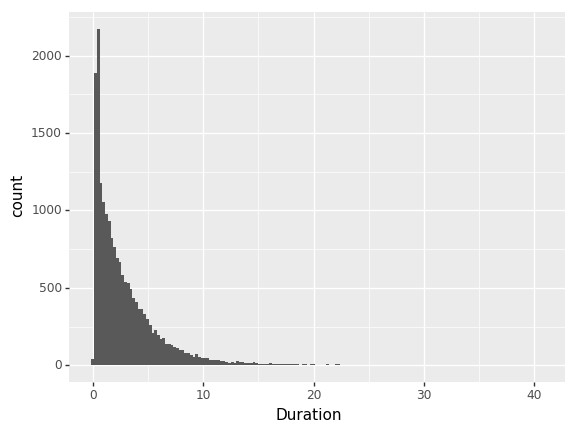

<ggplot: (-9223363246854859022)>

/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 81'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/plotnine/layer.py:360: UserWarning: stat_bin : Removed 88 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


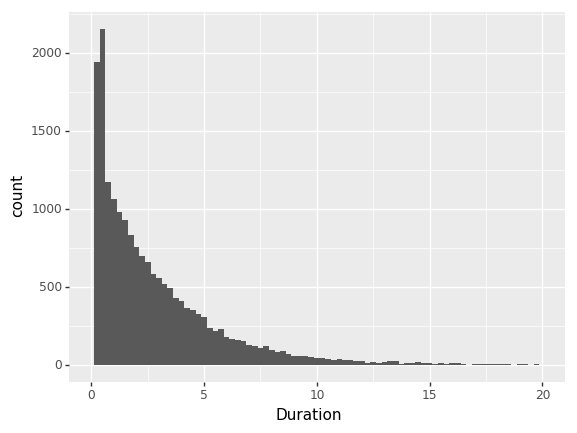

<ggplot: (-9223363246853861821)>

In [55]:
ggplot(durations_df, aes(x="Duration")) + geom_histogram()
# ggplot(durations_df, aes(x="Duration")) + geom_histogram() + xlim(0.0, 20.0)
buckeye_durations_plot = ggplot(durations_df, aes(x="Duration")) + geom_histogram() + xlim(0.0, 20.0)
buckeye_durations_plot

In [56]:
lengths_df.sort_values(by='Length', ascending=False)

,Length
14896,196
800,155
15157,151
5688,148
14881,130
14768,123
15169,120
5840,119
2249,117
5653,114


/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 200'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


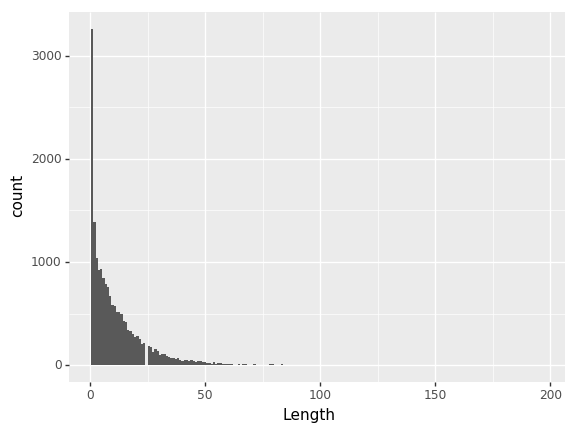

<ggplot: (-9223363246855175634)>

/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 61'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/plotnine/layer.py:360: UserWarning: stat_bin : Removed 233 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


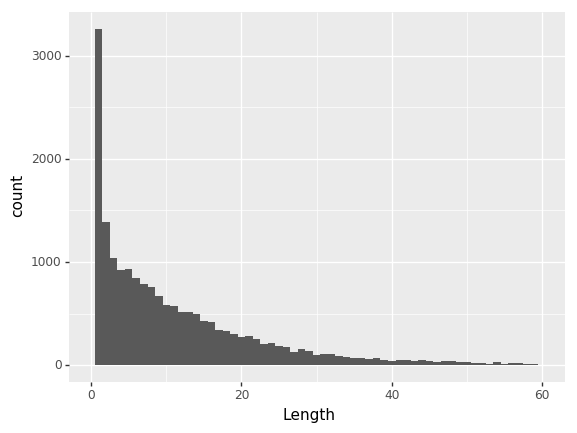

<ggplot: (8789999600234)>

In [57]:
ggplot(lengths_df, aes(x="Length")) + geom_histogram()
# ggplot(lengths_df, aes(x="Length")) + geom_histogram() + xlim(0.0, 60.0)
buckeye_length_plot = ggplot(lengths_df, aes(x="Length")) + geom_histogram() + xlim(0.0, 60.0)
buckeye_length_plot

# Comparison with Fisher

In [58]:
fisher_repo_dir = '/mnt/cube/home/AD/emeinhar/fisher-lm'

In [59]:
os.chdir(fisher_repo_dir)

In [60]:
%ls *vocab*

fisher_vocabulary_bbn.txt  fisher_vocabulary_main.txt


In [61]:
%cat -n fisher_vocabulary_bbn.txt | head -20

     1	'and
     2	'berserkly'
     3	'bout
     4	'burb
     5	'burban
     6	'burbs
     7	'cau
     8	'cause
     9	'cept
    10	'cide
    11	'cisco
    12	'cize
    13	'course
    14	'cuse
    15	'do
    16	'em
    17	'em's
    18	'ems
    19	'everybody's
    20	'fess
cat: write error: Broken pipe


In [62]:
%cat -n fisher_vocabulary_main.txt | head -20

     1	'and
     2	'berserkly'
     3	'bout
     4	'burb
     5	'burban
     6	'burbs
     7	'cau
     8	'cause
     9	'cept
    10	'cide
    11	'cisco
    12	'cize
    13	'course
    14	'cuse
    15	'do
    16	'em
    17	'em's
    18	'ems
    19	'everybody's
    20	'fess
cat: write error: Broken pipe


In [63]:
fisher_vocab_bbn_fn = 'fisher_vocabulary_bbn.txt'
fisher_vocab_main_fn = 'fisher_vocabulary_main.txt'

In [64]:
fisher_vocab_bbn = []
with open(fisher_vocab_bbn_fn) as file:
    for line in file:
        fisher_vocab_bbn.append(line.rstrip())


fisher_vocab_main = []
with open(fisher_vocab_main_fn) as file:
    for line in file:
        fisher_vocab_main.append(line.rstrip())

In [65]:
len(fisher_vocab_bbn)
len(fisher_vocab_main)

42013

44064

In [66]:
fisher_vocab_bbn = set(fisher_vocab_bbn)
fisher_vocab_main = set(fisher_vocab_main)

In [67]:
def compare_sizes(before, after):
    print("{0} vs. {1}".format(len(before), len(after)))

In [68]:
def normalize_case(vocabulary):
    return set(map(lambda w: w.lower(),
                   vocabulary))

In [69]:
buckeye_vocab = vocabulary_buckeye
buckeye_vocab_lc = set(normalize_case(buckeye_vocab))
fisher_vocab_bbn_lc = set(normalize_case(fisher_vocab_bbn))
fisher_vocab_main_lc = set(normalize_case(fisher_vocab_main))

In [70]:
compare_sizes(buckeye_vocab, buckeye_vocab_lc)
compare_sizes(fisher_vocab_bbn, fisher_vocab_bbn_lc)
compare_sizes(fisher_vocab_main, fisher_vocab_main_lc)

7999 vs. 7999
42013 vs. 42013
44064 vs. 44064


In [71]:
vocab_unique_to_fisher = fisher_vocab_main_lc - buckeye_vocab_lc
len(vocab_unique_to_fisher)

36571

In [72]:
vocab_unique_to_buckeye = buckeye_vocab_lc - fisher_vocab_main_lc
len(vocab_unique_to_buckeye)

506

In [73]:
vocab_unique_to_buckeye

{'aderal',
 "adriatico's",
 'aeronautical',
 'ag',
 'agitation',
 'agler',
 'ails',
 'aline',
 'amazement',
 'ambulation',
 "amy's",
 'analyzes',
 "angela's",
 'angriest',
 'anorism',
 'apologetics',
 'apostolic',
 'appaling',
 'aroma',
 'arranges',
 'auditorially',
 'auditoriums',
 'automating',
 'autoworkers',
 'babysits',
 'backbeats',
 'backstreet',
 'backwater',
 'bainby',
 'ballplayer',
 'baptism',
 'barbarism',
 'bargained',
 'basslines',
 'beatitudes',
 'beechwold',
 'bellbottoms',
 'berth',
 'bethel',
 'bexley',
 'biff',
 'biggin',
 'bioinformatics',
 'blisters',
 'bloodpressure',
 'bons',
 'booklets',
 'borden',
 "borden's",
 'botany',
 'boxspring',
 'brailles',
 'brandenberg',
 'brink',
 'butterball',
 'byrds',
 'c.a.h.s.',
 'cahs',
 'canberra',
 'canvassing',
 'caregivers',
 'carryable',
 'cartoony',
 'carwash',
 'ccd',
 "center'd",
 'cesareans',
 'chants',
 'charleton',
 'chauvinist',
 'cheapskate',
 'check-up',
 'cheetohs',
 'chested',
 'chilicothe',
 'chillers',
 'chocol

In [74]:
buckeye_utterance_relation[0]

{'speaker_name': 's05',
 'track_name': 's0501a',
 'speaker_age': 'o',
 'speaker_interviewer': 'f',
 'speaker_sex': 'f',
 'speech': 'i uh grew up in',
 'dur': 0.9846080000000015,
 'has_missing_syllables': False,
 'beg': 40.384767,
 'end': 41.369375,
 'speech_rate': 5.078163086223139}

In [75]:
def getWordTokens(utterance_rel):
    return tuple(utterance_rel['speech'].split(' '))

getWordTokens(buckeye_utterance_relation[0])

buckeye_word_tokens = tuple(chain.from_iterable(map(getWordTokens,
                                                    buckeye_utterance_relation)))
len(buckeye_word_tokens)

('i', 'uh', 'grew', 'up', 'in')

225669

In [76]:
buckeye_orth_freqs = Counter(buckeye_word_tokens)
buckeye_orth_freqs.most_common()

[('<rem>', 9607),
 ('i', 9418),
 ('and', 8227),
 ('the', 6204),
 ('to', 4889),
 ('a', 4549),
 ('that', 4275),
 ('it', 3520),
 ('like', 3504),
 ('you', 3475),
 ('of', 3091),
 ('yknow', 2847),
 ('they', 2835),
 ('in', 2580),
 ('uh', 2556),
 ("it's", 2292),
 ('but', 2248),
 ('was', 2227),
 ('so', 2035),
 ('yeah', 1994),
 ('just', 1979),
 ("don't", 1722),
 ('um', 1692),
 ('have', 1623),
 ('know', 1484),
 ('is', 1466),
 ('my', 1378),
 ('he', 1375),
 ('think', 1366),
 ('for', 1329),
 ('we', 1326),
 ('do', 1298),
 ('mean', 1214),
 ('or', 1178),
 ('there', 1173),
 ('be', 1159),
 ('on', 1149),
 ('not', 1148),
 ('with', 1136),
 ('because', 1122),
 ('really', 1107),
 ("that's", 1090),
 ('what', 1014),
 ('well', 1000),
 ('people', 985),
 ('if', 981),
 ("i'm", 940),
 ('at', 910),
 ('all', 908),
 ('this', 901),
 ('get', 877),
 ('go', 859),
 ('are', 850),
 ('about', 848),
 ('when', 835),
 ('them', 819),
 ('out', 795),
 ('she', 785),
 ('me', 760),
 ('then', 730),
 ('had', 730),
 ('as', 716),
 ('one', 

In [77]:
buckeye_unique_vocab_by_freq = Counter({w:buckeye_orth_freqs[w] for w in vocab_unique_to_buckeye})
buckeye_unique_vocab_by_freq.most_common()

[('yknow', 2847),
 ('hafta', 52),
 ('mm-hmm', 41),
 ('northland', 19),
 ('hum-um', 15),
 ('clintonville', 15),
 ('meijer', 9),
 ("u's", 9),
 ('grandview', 7),
 ('hilliard', 7),
 ('olentangy', 7),
 ('useta', 6),
 ('cosi', 5),
 ('wexner', 5),
 ('fatherly', 4),
 ('jansen', 4),
 ('jalena', 4),
 ('bethel', 4),
 ('inalienable', 3),
 ('webbing', 3),
 ('steubenville', 3),
 ('vestibules', 3),
 ('femalee', 3),
 ('scooney', 3),
 ('sunbury', 3),
 ('developers', 3),
 ('jedd', 3),
 ('cheapskate', 3),
 ('tallow', 3),
 ('pokedex', 3),
 ('otterbein', 3),
 ('decoder', 2),
 ('out-r-inn', 2),
 ('twizzlers', 2),
 ('unbrand', 2),
 ('deafness', 2),
 ('lateral', 2),
 ('vestibule', 2),
 ('orangello', 2),
 ('sermon', 2),
 ('manwich', 2),
 ('apologetics', 2),
 ('dole', 2),
 ('anorism', 2),
 ('ordinances', 2),
 ('bloodpressure', 2),
 ("doty's", 2),
 ('vesture', 2),
 ("cosi's", 2),
 ('trimester', 2),
 ('leche', 2),
 ('wyandot', 2),
 ('hilltop', 2),
 ('geezy', 2),
 ('comforters', 2),
 ("emma's", 2),
 ('whetstone', 

There's nothing too concerning here...

# Making a word relation for confusability analysis

In [78]:
buckeye_utterance_relation[0]

{'speaker_name': 's05',
 'track_name': 's0501a',
 'speaker_age': 'o',
 'speaker_interviewer': 'f',
 'speaker_sex': 'f',
 'speech': 'i uh grew up in',
 'dur': 0.9846080000000015,
 'has_missing_syllables': False,
 'beg': 40.384767,
 'end': 41.369375,
 'speech_rate': 5.078163086223139}

For each speech word token in the corpus, we want
 - the orthographic wordform
 - the IPA phonemic transcription
 - the IPA phone transcription
 - whether the phone transcription contains any vowels or syllabic consonants
 - all preceding wordforms in the (processed) utterance
 - the 4 preceding orthographic wordforms in the (processed) utterance
 - whether the word is adjacent to any disfluencies, pauses, or filled pauses
 - the duration.
 
We also want 
 - the track and speaker track name
 - the speaker metadata (ID, age, and sex)
 - the interviewer metadata
 - some other metadata natively associated with words by `buckeye` (beginning, end, misaligned flag, POS, number of syllables).

In [79]:
vowelsAndSyllabicConsanants = (
 'ʊ',
 'ʌ̃',
 'n̩',
 'aʊ',
 'ɚ',
 'oʊ',
 'ɔ',
 'ʌ',
 'ẽɪ̃',
 'oʊ',
 'ũ',
 'ʌ',
 'ʊ̃',
 'aʊ',
 'ʌ̃',
 'aɪ',
 'æ̃',
 'eɪ',
 'ɚ',
 'ɪ',
 'aɪ',
 'l̩',
 'u',
 'i',
 'ɪ̃',
 'ĩ',
 'ɑ̃',
 'ɔɪ',
 'ɔ̃',
 'ɪ',
 'u',
 'æ',
 'm̩',
 'ɛ̃',
 'ɪ',
 'ɑ',
 'ɔɪ',
 'i',
 'ɛ')

In [80]:
s = "it's just music by different groups it's you know things you you wouldn't you wouldn't uh"
ws = s.split(' ')
len(ws)
i = 3
j = 8

ws[j]
ws[j-4 if j-4 > 0 else 0:j]

ws[i]
ws[i-4 if i-4 > 0 else 0:i]

def get_ngram_context(word_seq, i, n=None):
    if n is None:
        n = 4
    assert n > 0
    assert i > -1
    assert i < len(word_seq)
    return word_seq[i-n if i-n > 0 else 0:i]

get_ngram_context(ws, 8)
get_ngram_context(ws, 3)

def get_ngram_contexts(word_seq, n=None):
    if n is None:
        n = 4
    assert n > 0
    return tuple(map(lambda i: get_ngram_context(word_seq, i),
                     range(len(word_seq))))

def get_all_prefixes(word_seq):
    return [word_seq[0:i] for i in range(len(word_seq)+1)]

def get_all_contexts(word_seq):
    return get_all_prefixes(word_seq)[:-1]

get_ngram_contexts(ws)
get_all_contexts(ws)

16

'know'

['different', 'groups', "it's", 'you']

'by'

["it's", 'just', 'music']

['different', 'groups', "it's", 'you']

["it's", 'just', 'music']

([],
 ["it's"],
 ["it's", 'just'],
 ["it's", 'just', 'music'],
 ["it's", 'just', 'music', 'by'],
 ['just', 'music', 'by', 'different'],
 ['music', 'by', 'different', 'groups'],
 ['by', 'different', 'groups', "it's"],
 ['different', 'groups', "it's", 'you'],
 ['groups', "it's", 'you', 'know'],
 ["it's", 'you', 'know', 'things'],
 ['you', 'know', 'things', 'you'],
 ['know', 'things', 'you', 'you'],
 ['things', 'you', 'you', "wouldn't"],
 ['you', 'you', "wouldn't", 'you'],
 ['you', "wouldn't", 'you', "wouldn't"])

[[],
 ["it's"],
 ["it's", 'just'],
 ["it's", 'just', 'music'],
 ["it's", 'just', 'music', 'by'],
 ["it's", 'just', 'music', 'by', 'different'],
 ["it's", 'just', 'music', 'by', 'different', 'groups'],
 ["it's", 'just', 'music', 'by', 'different', 'groups', "it's"],
 ["it's", 'just', 'music', 'by', 'different', 'groups', "it's", 'you'],
 ["it's", 'just', 'music', 'by', 'different', 'groups', "it's", 'you', 'know'],
 ["it's",
  'just',
  'music',
  'by',
  'different',
  'groups',
  "it's",
  'you',
  'know',
  'things'],
 ["it's",
  'just',
  'music',
  'by',
  'different',
  'groups',
  "it's",
  'you',
  'know',
  'things',
  'you'],
 ["it's",
  'just',
  'music',
  'by',
  'different',
  'groups',
  "it's",
  'you',
  'know',
  'things',
  'you',
  'you'],
 ["it's",
  'just',
  'music',
  'by',
  'different',
  'groups',
  "it's",
  'you',
  'know',
  'things',
  'you',
  'you',
  "wouldn't"],
 ["it's",
  'just',
  'music',
  'by',
  'different',
  'groups',
  "it's",
  'you',
  'kno

In [81]:
def word_relation(w, local_orth_context, full_orth_context, words_in_utterance):
    r = {'orthographic_wordform':get_orthography(w),
         'preceding_4_wordforms':local_orth_context,
         'preceding_wordforms':full_orth_context,
         'POS':w.pos,
         'phonemes':get_phonemes(w),
         'phones':get_phones(w),
         'hasSyllabicSegsInPhones':any([s in get_phones(w) for s in vowelsAndSyllabicConsanants]),
         'hasAdjacentPauseOrDisfluency':hasAdjacentPauseOrDisfluency(w, words_in_utterance),
         'hasAdjacentFilledPause':hasAdjacentFilledPause(w, words_in_utterance),
         'syllables':w.syllables(),
         'beg':w.beg,
         'end':w.end,
         'duration':w.dur,
         'misalgined':w.misaligned}
    return r

def get_adjacent_wordObjs(key_wordObj, raw_wordObjs):
    raw_indices = range(len(raw_wordObjs))
    key_indices = [j for j,w in enumerate(raw_wordObjs) if w == key_wordObj]
    assert len(key_indices) > 0, 'key_wordObj not in raw_wordObjs:\n\tkey: {0}\n\traw_wordObjs:{1}'.format(key_wordObj, raw_wordObjs)
    assert len(key_indices) == 1, 'key_wordObj occurs more than once in raw_wordObjs:\n\t:: {0}\n\traw_wordObjs:{1}'.format(key_wordObj, raw_wordObjs)
    key_index = key_indices[0]
    left_index, right_index = key_index - 1, key_index + 1
    if left_index < 0:
        left_obj = None
    else:
        left_obj = raw_wordObjs[left_index]
    if right_index > len(raw_wordObjs) - 1:
        right_obj = None
    else:
        right_obj = raw_wordObjs[right_index]
    return left_obj, right_obj

def hasAdjacentPauseOrDisfluency(key_wordObj, raw_wordObjs):
    left_obj, right_obj = get_adjacent_wordObjs(key_wordObj, raw_wordObjs)
    if left_obj is not None:
        if not isWord(left_obj):
            return True
    if right_obj is not None:
        if not isWord(right_obj):
            return True
    return False

def hasAdjacentFilledPause(key_wordObj, raw_wordObjs):
    left_obj, right_obj = get_adjacent_wordObjs(key_wordObj, raw_wordObjs)
    if left_obj is not None:
        if isWord(left_obj):
            return isFilledPause(left_obj)
    if right_obj is not None:
        if isWord(right_obj):
            return isFilledPause(right_obj)
    return False

def utterance_to_word_relations(s, t, u):
    speaker_rel = speaker_relation(s)
    track_rel = track_relation(t)
    utt_rel = utterance_relation(u)
    metadata = {'track_name':track_rel['track_name'],
                'speaker_name':speaker_rel['speaker_name'],
                'speaker_age':speaker_rel['speaker_age'],
                'speaker_sex':speaker_rel['speaker_sex'],
                'speaker_interviewer':speaker_rel['speaker_interviewer'],
                'speech_rate':utt_rel['speech_rate']}
    Ws_raw = u.words
    Ws = [w for w in u.words if isWord(w)]
    local_contexts = get_ngram_contexts(utt_rel['speech'].split(' '))
    full_contexts = get_all_contexts(utt_rel['speech'].split(' '))
#     assert len(local_contexts) == len(Ws_raw), '|local contexts| != |Ws|: {0} vs. {1}\n\tWs:{2}\n\tLCs:{3}'.format(len(local_contexts), len(Ws_raw), Ws_raw, local_contexts)
#     assert len(full_contexts) == len(Ws_raw), '|full contexts| != |Ws|: {0} vs. {1}\n\tWs:{2}\n\tLCs:{3}'.format(len(full_contexts), len(Ws_raw), Ws_raw, full_contexts)
    
    make_word_rel = lambda w, l, f: word_relation(w, l ,f , Ws_raw)
    w_rels = list(starmap(make_word_rel, 
                          zip(Ws, local_contexts, full_contexts)))
    w_rels = list(map(lambda wr: dictionary_product(wr, metadata),
                      w_rels))
    for i, w_rel in enumerate(w_rels):
        w_rel.update({'dist_from_left_edge':i})
        w_rel.update({'dist_from_right_edge':len(w_rels)-i-1})
    return w_rels

In [82]:
s0 = speakers[0]; s0
t0 = s0.tracks[0]; t0
utts_t0 = get_utterances(t0); utts_t0[:3]
u0 = utts_t0[0]; u0
' '
utterance_to_word_relations(s0, t0, u0)

Speaker("s05")

Track("s0501a")

[Utterance([Word('i', 40.384767, 40.735815, ['ay'], ['ay'], 'PRP'), Word('uh', 40.735815, 40.906827, ['ah'], ['ah'], 'UH'), Word('grew', 40.906827, 41.130238, ['g', 'r', 'uw'], ['g', 'r', 'uw'], 'VBD'), Word('up', 41.130238, 41.284995, ['ah', 'p'], ['ah', 'p'], 'RP'), Word('in', 41.284995, 41.369375, ['ih', 'n'], ['ih', 'n'], 'IN')]),
 Utterance([Word('is', 42.087948, 42.194687, ['ih', 'z'], ['ih', 'z'], 'VBZ'), Word('this', 42.194687, 42.357005, ['dh', 'ih', 's'], ['ih', 's'], 'DT'), Word('is', 42.357005, 42.479503, ['ih', 'z'], ['ih', 'z'], 'VBZ'), Word('this', 42.479503, 42.642588, ['dh', 'ih', 's'], ['z', 'ih', 's'], 'DT')]),
 Utterance([Word('because', 43.148661, 43.389994, ['b', 'ih', 'k', 'ah', 'z'], ['k', 'ih', 'z'], 'IN'), Pause('<SIL>', 43.389994, 43.508578), Word('it', 43.508578, 43.611039, ['ih', 't'], ['ih', 't'], 'PRP'), Word('slipped', 43.611039, 44.007683, ['s', 'l', 'ih', 'p', 't'], ['s', 'l', 'ih', 'p', 't'], 'VBD'), Pause('<NOISE-since>', 44.007683, 44.254687), Pause

Utterance([Word('i', 40.384767, 40.735815, ['ay'], ['ay'], 'PRP'), Word('uh', 40.735815, 40.906827, ['ah'], ['ah'], 'UH'), Word('grew', 40.906827, 41.130238, ['g', 'r', 'uw'], ['g', 'r', 'uw'], 'VBD'), Word('up', 41.130238, 41.284995, ['ah', 'p'], ['ah', 'p'], 'RP'), Word('in', 41.284995, 41.369375, ['ih', 'n'], ['ih', 'n'], 'IN')])

' '

[{'orthographic_wordform': 'i',
  'POS': 'PRP',
  'syllables': 1,
  'hasAdjacentPauseOrDisfluency': False,
  'duration': 0.3510480000000058,
  'phonemes': 'aɪ',
  'phones': 'aɪ',
  'hasAdjacentFilledPause': True,
  'misalgined': False,
  'hasSyllabicSegsInPhones': True,
  'beg': 40.384767,
  'end': 40.735815,
  'preceding_4_wordforms': [],
  'preceding_wordforms': [],
  'speaker_name': 's05',
  'track_name': 's0501a',
  'speech_rate': 5.078163086223139,
  'speaker_age': 'o',
  'speaker_interviewer': 'f',
  'speaker_sex': 'f',
  'dist_from_left_edge': 0,
  'dist_from_right_edge': 4},
 {'orthographic_wordform': 'uh',
  'POS': 'UH',
  'syllables': 1,
  'hasAdjacentPauseOrDisfluency': False,
  'duration': 0.1710119999999975,
  'phonemes': 'ʌ',
  'phones': 'ʌ',
  'hasAdjacentFilledPause': False,
  'misalgined': False,
  'hasSyllabicSegsInPhones': True,
  'beg': 40.735815,
  'end': 40.906827,
  'preceding_4_wordforms': ['i'],
  'preceding_wordforms': ['i'],
  'speaker_name': 's05',
  'track_

In [83]:
# WAS ~12s on wittgenstein
# is now ~2m due to annotations wrt pauses, filled pauses, and disfluencies
buckeye_word_relation = list(chain.from_iterable([utterance_to_word_relations(s,t,u)
                                                  for s in speakers for t in s.tracks for u in get_utterances(t)]))
len(buckeye_word_tokens)
len(buckeye_word_relation)
buckeye_word_relation[:5]

225669

216062

[{'orthographic_wordform': 'i',
  'POS': 'PRP',
  'syllables': 1,
  'hasAdjacentPauseOrDisfluency': False,
  'duration': 0.3510480000000058,
  'phonemes': 'aɪ',
  'phones': 'aɪ',
  'hasAdjacentFilledPause': True,
  'misalgined': False,
  'hasSyllabicSegsInPhones': True,
  'beg': 40.384767,
  'end': 40.735815,
  'preceding_4_wordforms': [],
  'preceding_wordforms': [],
  'speaker_name': 's05',
  'track_name': 's0501a',
  'speech_rate': 5.078163086223139,
  'speaker_age': 'o',
  'speaker_interviewer': 'f',
  'speaker_sex': 'f',
  'dist_from_left_edge': 0,
  'dist_from_right_edge': 4},
 {'orthographic_wordform': 'uh',
  'POS': 'UH',
  'syllables': 1,
  'hasAdjacentPauseOrDisfluency': False,
  'duration': 0.1710119999999975,
  'phonemes': 'ʌ',
  'phones': 'ʌ',
  'hasAdjacentFilledPause': False,
  'misalgined': False,
  'hasSyllabicSegsInPhones': True,
  'beg': 40.735815,
  'end': 40.906827,
  'preceding_4_wordforms': ['i'],
  'preceding_wordforms': ['i'],
  'speaker_name': 's05',
  'track_

## Write to file

In [84]:
os.chdir(repo_dir)
os.getcwd()
os.listdir()

'/mnt/cube/home/AD/emeinhar/buckeye-lm'

['Preprocessing Buckeye corpus transcriptions for ease of processing and use with kenlm.ipynb',
 'Converting Buckeye Transcriptions to Unicode IPA symbols.ipynb',
 '.gitignore',
 '.ipynb_checkpoints',
 'buckeye_utterances_relation.json',
 'README.md',
 'buckeye_vocabulary.txt',
 'buckeye_orthography_phonemic_relation.tsv',
 'buckeye_words_analysis_relation.json',
 '.git',
 'buckeye_utterances.txt']

In [85]:
buckeye_words_analysis_relation_fn = 'buckeye_words_analysis_relation.json'

buckeye_words_analysis_relation_path = os.path.join(repo_dir, buckeye_words_analysis_relation_fn)

#~60s on wittgenstein
with open(buckeye_words_analysis_relation_path, 'w', encoding='utf8') as json_file:
    json.dump(buckeye_word_relation, json_file, indent=1, ensure_ascii=False)

In [86]:
%cat -n buckeye_words_analysis_relation.json | head -60

     1	[
     2	 {
     3	  "orthographic_wordform": "i",
     4	  "POS": "PRP",
     5	  "syllables": 1,
     6	  "hasAdjacentPauseOrDisfluency": false,
     7	  "duration": 0.3510480000000058,
     8	  "phonemes": "aɪ",
     9	  "phones": "aɪ",
    10	  "hasAdjacentFilledPause": true,
    11	  "misalgined": false,
    12	  "hasSyllabicSegsInPhones": true,
    13	  "beg": 40.384767,
    14	  "end": 40.735815,
    15	  "preceding_4_wordforms": [],
    16	  "preceding_wordforms": [],
    17	  "speaker_name": "s05",
    18	  "track_name": "s0501a",
    19	  "speech_rate": 5.078163086223139,
    20	  "speaker_age": "o",
    21	  "speaker_interviewer": "f",
    22	  "speaker_sex": "f",
    23	  "dist_from_left_edge": 0,
    24	  "dist_from_right_edge": 4
    25	 },
    26	 {
    27	  "orthographic_wordform": "uh",
    28	  "POS": "UH",
    29	  "syllables": 1,
    30	  "hasAdjacentPauseOrDisfluency": false,
    31	  "duration": 0.1710119999999975,
    32	  "phonemes": "ʌ",
    33	  "phones

# Bigram, trigram, and 4-gram contexts

In [88]:
local_contexts = [r['preceding_4_wordforms'] for r in buckeye_word_relation]
len(local_contexts)

216062

In [91]:
local_contexts[2355]

['yknow', "it's", 'just', 'the']

In [100]:
fourgram_contexts = [tuple(c) for c in local_contexts if len(c) == 4]
len(fourgram_contexts)

154719

In [104]:
Counter(fourgram_contexts).most_common()

[(('i', "don't", 'know', 'if'), 65),
 (('i', "don't", 'know', 'i'), 59),
 (('<rem>', 'i', "don't", 'know'), 49),
 (('a', 'lot', 'of', 'people'), 43),
 (('or', 'something', 'like', 'that'), 38),
 (('i', "don't", 'know', 'what'), 36),
 (('i', "don't", 'know', '<rem>'), 28),
 (('a', 'lot', 'of', 'the'), 28),
 (('i', "don't", 'know', 'how'), 27),
 (('you', 'know', 'what', 'i'), 27),
 (("there's", 'a', 'lot', 'of'), 25),
 (('i', "don't", 'want', 'to'), 24),
 (('when', 'i', 'was', 'a'), 21),
 (('i', 'think', 'a', 'lot'), 20),
 (('i', "don't", 'think', 'they'), 20),
 (('know', 'what', 'i', 'mean'), 20),
 (('i', 'think', 'it', 'was'), 19),
 (('when', 'i', 'was', 'in'), 19),
 (('i', "don't", 'know', 'why'), 19),
 (('i', 'mean', 'i', "don't"), 19),
 (('<rem>', 'i', 'mean', 'i'), 18),
 (('think', 'a', 'lot', 'of'), 18),
 (('and', 'i', 'think', 'that'), 18),
 (('a', 'lot', 'of', 'times'), 18),
 (('i', 'mean', 'it', 'was'), 17),
 (('<rem>', 'i', 'think', "it's"), 17),
 (('i', "don't", 'i', "don't")

In [101]:
trigram_contexts = [tuple(c) for c in local_contexts if len(c) == 3]
len(trigram_contexts)

12999

In [105]:
Counter(trigram_contexts).most_common()

[(('i', "don't", 'know'), 170),
 (('i', "don't", 'think'), 44),
 (('i', 'mean', 'i'), 38),
 (('and', 'i', 'think'), 32),
 (('a', 'lot', 'of'), 27),
 (('and', 'i', "don't"), 19),
 (('i', 'think', 'it'), 18),
 (('i', '<rem>', 'i'), 17),
 (('um', '<rem>', 'i'), 16),
 (('i', 'think', "it's"), 15),
 (('well', 'i', 'think'), 15),
 (('and', 'it', 'was'), 15),
 (('when', 'i', 'was'), 15),
 (('so', 'i', 'think'), 14),
 (('i', 'think', 'that'), 14),
 (('but', 'i', 'think'), 14),
 (('and', 'that', 'was'), 14),
 (('but', 'i', "don't"), 13),
 (('yeah', 'i', 'think'), 13),
 (('yeah', 'i', 'mean'), 13),
 (('and', 'i', 'was'), 13),
 (('as', 'far', 'as'), 12),
 (('i', "don't", 'really'), 12),
 (('and', 'i', 'mean'), 12),
 (('i', 'mean', '<rem>'), 12),
 (('so', 'i', 'mean'), 11),
 (('but', 'it', 'was'), 11),
 (('i', 'think', 'the'), 11),
 (('and', '<rem>', 'i'), 11),
 (('i', 'just', 'think'), 11),
 (("it's", 'kind', 'of'), 11),
 (('i', "don't", 'want'), 11),
 (('and', 'um', '<rem>'), 10),
 (('i', 'think

In [102]:
bigram_contexts = [tuple(c) for c in local_contexts if len(c) == 2]
len(bigram_contexts)

14059

In [106]:
Counter(bigram_contexts).most_common()

[(('i', "don't"), 336),
 (('i', 'mean'), 228),
 (('and', 'i'), 217),
 (('i', 'think'), 194),
 (('yeah', 'i'), 108),
 (('and', 'then'), 92),
 (('so', 'i'), 87),
 (('well', 'i'), 86),
 (('um', '<rem>'), 84),
 (('yeah', '<rem>'), 77),
 (('but', 'i'), 74),
 (('and', 'uh'), 67),
 (('i', 'was'), 67),
 (('and', 'they'), 66),
 (('it', 'was'), 62),
 (('you', 'know'), 60),
 (('i', 'just'), 59),
 (('and', '<rem>'), 57),
 (('um', 'i'), 54),
 (('and', 'the'), 53),
 (('uh', '<rem>'), 53),
 (('i', '<rem>'), 52),
 (('yknow', 'i'), 51),
 (("it's", 'just'), 50),
 (('oh', 'yeah'), 49),
 (('and', 'it'), 49),
 (('and', 'he'), 47),
 (('yeah', 'and'), 44),
 (('no', 'i'), 43),
 (('and', 'that'), 41),
 (('i', 'i'), 40),
 (('i', 'know'), 38),
 (("it's", 'like'), 38),
 (('and', 'so'), 37),
 (("it's", 'a'), 37),
 (('and', "it's"), 37),
 (('uh', 'i'), 36),
 (('and', 'you'), 36),
 (('because', 'i'), 36),
 (('i', 'would'), 35),
 (('yknow', '<rem>'), 33),
 (('and', "that's"), 33),
 (('when', 'i'), 33),
 (('and', 'we'

In [103]:
unigram_contexts = [tuple(c) for c in local_contexts if len(c) == 1]
len(unigram_contexts)
len(set(unigram_contexts))
len(set(vocabulary_buckeye))

15514

1291

7999

In [107]:
Counter(unigram_contexts).most_common()

[(('i',), 1711),
 (('and',), 1539),
 (('yeah',), 733),
 (('but',), 536),
 (('uh',), 531),
 (('yknow',), 523),
 (('um',), 459),
 (('so',), 407),
 (("it's",), 391),
 (('well',), 382),
 (('oh',), 341),
 (('you',), 256),
 (('they',), 250),
 (('the',), 248),
 (('it',), 236),
 (('like',), 201),
 (('no',), 188),
 (('that',), 179),
 (("that's",), 176),
 (('because',), 171),
 (('he',), 167),
 (("i'm",), 153),
 (('we',), 145),
 (('a',), 136),
 (('my',), 109),
 (('just',), 106),
 (('right',), 99),
 (('not',), 99),
 (('in',), 98),
 (('or',), 95),
 (('if',), 94),
 (('she',), 83),
 (('what',), 82),
 (('when',), 82),
 (('to',), 81),
 (('then',), 71),
 (("there's",), 69),
 (("they're",), 68),
 (('is',), 66),
 (('um-hum',), 66),
 (('for',), 64),
 (('there',), 61),
 (('now',), 58),
 (("he's",), 51),
 (('which',), 49),
 (('some',), 49),
 (('as',), 48),
 (('where',), 45),
 (("i've",), 44),
 (('people',), 42),
 (('all',), 42),
 (("she's",), 42),
 (('at',), 41),
 (("you're",), 40),
 (('do',), 39),
 (('yes',

## Write to file

In [112]:
%%capture
#cell magic above suppresses useless output of file.write

fourgrams_buckeye_alpha = sorted(list(set(fourgram_contexts)))

fourgrams_buckeye_fn = 'buckeye_fourgram_contexts.txt'

fourgrams_buckeye_fp = os.path.join(repo_dir, fourgrams_buckeye_fn)

with open(fourgrams_buckeye_fp, 'w') as file:
    for w in fourgrams_buckeye_alpha:
        file.write("{0}\n".format(w));

In [113]:
len(fourgrams_buckeye_alpha)

145292

In [111]:
%%capture
#cell magic above suppresses useless output of file.write

trigrams_buckeye_alpha = sorted(list(set(trigram_contexts)))

trigrams_buckeye_fn = 'buckeye_trigram_contexts.txt'

trigrams_buckeye_fp = os.path.join(repo_dir, trigrams_buckeye_fn)

with open(trigrams_buckeye_fp, 'w') as file:
    for w in trigrams_buckeye_alpha:
        file.write("{0}\n".format(w));

In [114]:
len(trigrams_buckeye_alpha)

10348

In [109]:
%%capture
#cell magic above suppresses useless output of file.write

bigrams_buckeye_alpha = sorted(list(set(bigram_contexts)))

bigrams_buckeye_fn = 'buckeye_bigram_contexts.txt'

bigrams_buckeye_fp = os.path.join(repo_dir, bigrams_buckeye_fn)

with open(bigrams_buckeye_fp, 'w') as file:
    for w in bigrams_buckeye_alpha:
        file.write("{0}\n".format(w));

In [115]:
len(bigrams_buckeye_alpha)

5776

In [110]:
%%capture
#cell magic above suppresses useless output of file.write

unigrams_buckeye_alpha = sorted(list(set(unigram_contexts)))

unigrams_buckeye_fn = 'buckeye_unigram_contexts.txt'

unigrams_buckeye_fp = os.path.join(repo_dir, unigrams_buckeye_fn)

with open(unigrams_buckeye_fp, 'w') as file:
    for w in unigrams_buckeye_alpha:
        file.write("{0}\n".format(w));

In [116]:
len(unigrams_buckeye_alpha)

1291

In [117]:
total_num_contexts = len(unigrams_buckeye_alpha) + len(bigrams_buckeye_alpha) + len(trigrams_buckeye_alpha) + len(fourgrams_buckeye_alpha)
total_num_contexts

162707

In [118]:
len(vocabulary_buckeye_alpha)

7999